<a href="https://colab.research.google.com/github/Rupasri20055/Project-Fraud-Detection-in-Credit-Card-Transactions/blob/main/Fraud_Detection_in_Credit_Card_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Required Libraries**

In [4]:
!pip install imbalanced-learn xgboost


**Import Required Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')


**Load Dataset**

In [6]:
# Upload your creditcard.csv file to Colab before this step
data = pd.read_csv("creditcard.csv")
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Handle Missing Values**

In [7]:
print("Missing before cleaning:\n", data.isnull().sum())
data.dropna(inplace=True)
print("Missing after cleaning:\n", data.isnull().sum())


Missing before cleaning:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Missing after cleaning:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Analyze Class Distribution**

In [8]:
print("Class Distribution:\n", data['Class'].value_counts())


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


**Class Distribution Visualizations**

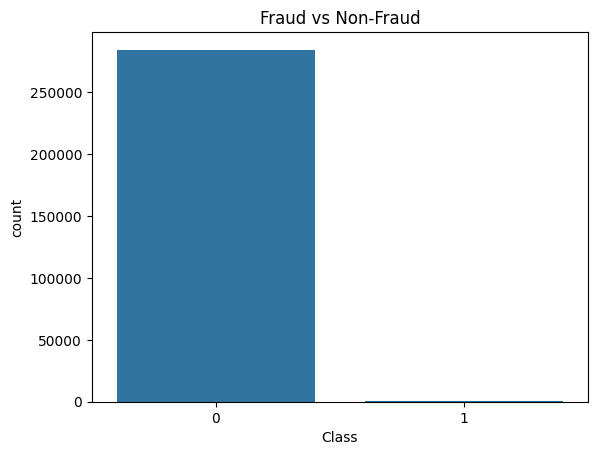

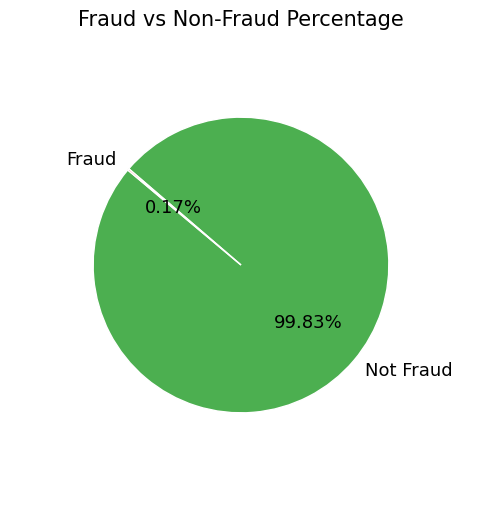

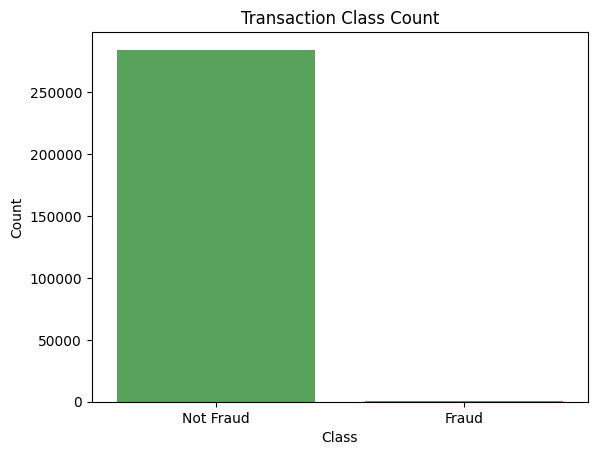

In [9]:
# Count plot
sns.countplot(x='Class', data=data)
plt.title('Fraud vs Non-Fraud')
plt.show()

# Pie chart
fraud_counts = data['Class'].value_counts()
labels = ['Not Fraud', 'Fraud']
colors = ['#4CAF50', '#F44336']
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(fraud_counts, labels=labels, autopct='%1.2f%%',
       startangle=140, colors=colors, radius=0.8,
       textprops={'fontsize': 13}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Fraud vs Non-Fraud Percentage', fontsize=15)
plt.show()

# Bar chart
sns.barplot(x=data['Class'].value_counts().index,
            y=data['Class'].value_counts().values,
            palette=['#4CAF50', '#F44336'])
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.title('Transaction Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Correlation Heatmap**



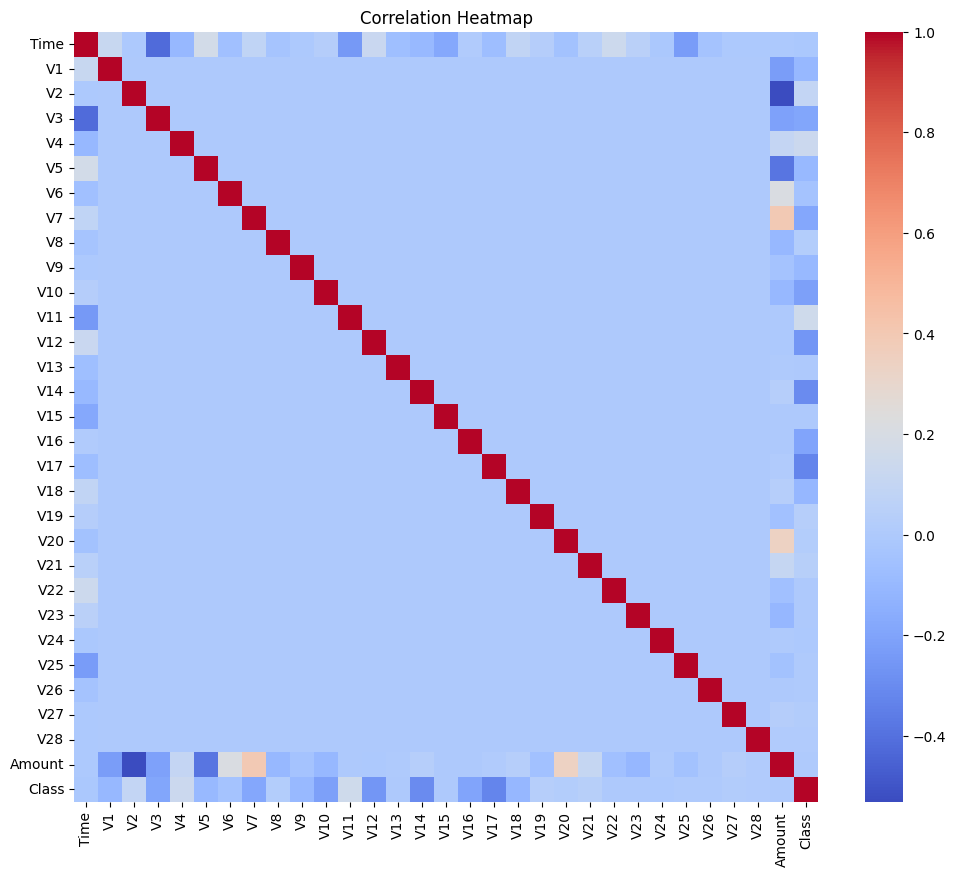

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Transaction Amount Distribution**

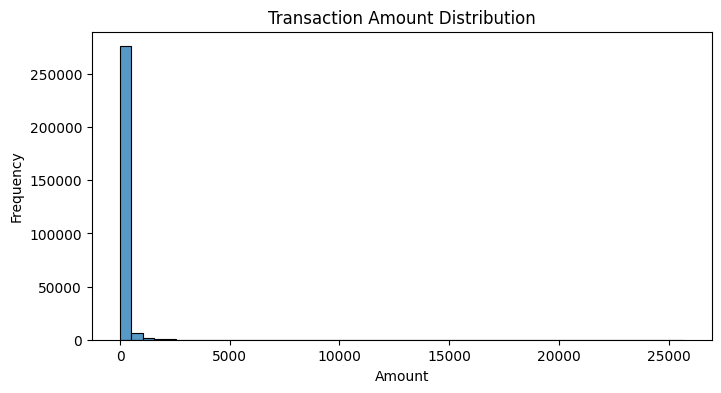

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(data['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


**Feature Scaling**

In [12]:
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)


**Split Features & Labels**

In [13]:
X = data.drop('Class', axis=1)
y = data['Class']
print("Null in y:", y.isnull().sum())


Null in y: 0


**Train-Test Split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Train Class Distribution:\n", y_train.value_counts())


Train Class Distribution:
 Class
0    227451
1       394
Name: count, dtype: int64


**Apply SMOTE**

In [15]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("After SMOTE:\n", y_train_sm.value_counts())


After SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


**Train XGBoost Model**

In [17]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_sm, y_train_sm);


**Make Predictions**

In [18]:
y_pred = model.predict(X_test)


**Evaluate the Model**



In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[56832    32]
 [   11    87]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9435961779196765


**ROC Curve Plot**

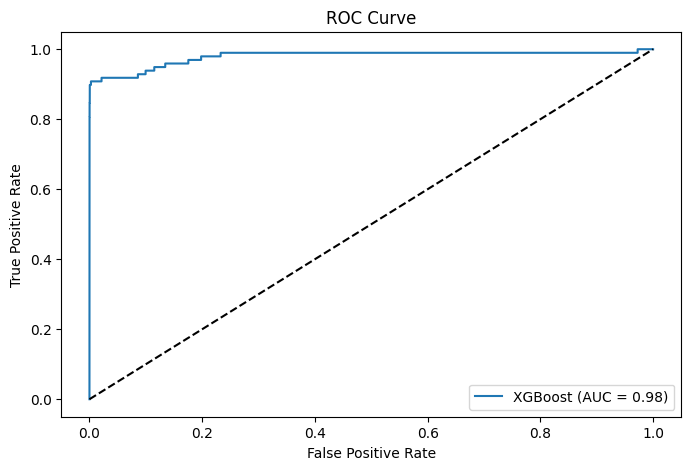

In [20]:
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**Save the Model**

In [21]:
joblib.dump(model, "xgboost_model.pkl")
print("✅ Model saved as xgboost_model.pkl")


✅ Model saved as xgboost_model.pkl


**BONUS (Optional): Download Model from Colab**

In [22]:
from google.colab import files
files.download("xgboost_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>